In [1]:
import json
from pathlib import Path
from collections import defaultdict
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

### variable naming convention

* c -> cricketers
* a -> actors
* p -> politicians

In [2]:
base_dir = Path(r"D:\College\research\indic_wikibot\SC_project\SC-Project")

names = {
    'a':'actors',
    'c':'cricketers',
    'p':'politicians' 
}

path = defaultdict(lambda x:0)
for _ in names.keys():
    path[_] = Path.joinpath(base_dir, 'data', 'ver 3', 'final_' + names[_] + '.json')

data = defaultdict(lambda x:0)
for _ in path.keys():
    with open(path[_], 'r') as read_file:
        data[_] = json.load(read_file)

### Frequency of each triple across whole subdomain data

In [3]:
triple_freq = defaultdict(lambda: {})

for key in names.keys():
    for entity_id in data[key].keys():
        for triple in data[key][entity_id]['triples']:
            if triple['propertyLabel'] in triple_freq[key].keys():
                triple_freq[key][triple['propertyLabel']] += 1
            else:
                triple_freq[key][triple['propertyLabel']] = 1

In [4]:
triple_count = defaultdict(lambda: 0)
for key in names.keys():
    for label in triple_freq[key].keys():
        triple_count[key] += triple_freq[key][label]

In [5]:
triple_count

defaultdict(<function __main__.<lambda>()>,
            {'a': 97628, 'c': 38493, 'p': 171413})

### Visualizing the distribution of frequency of triples

Text(0, 0.5, 'Count of triples with specified frequency on x-axis')

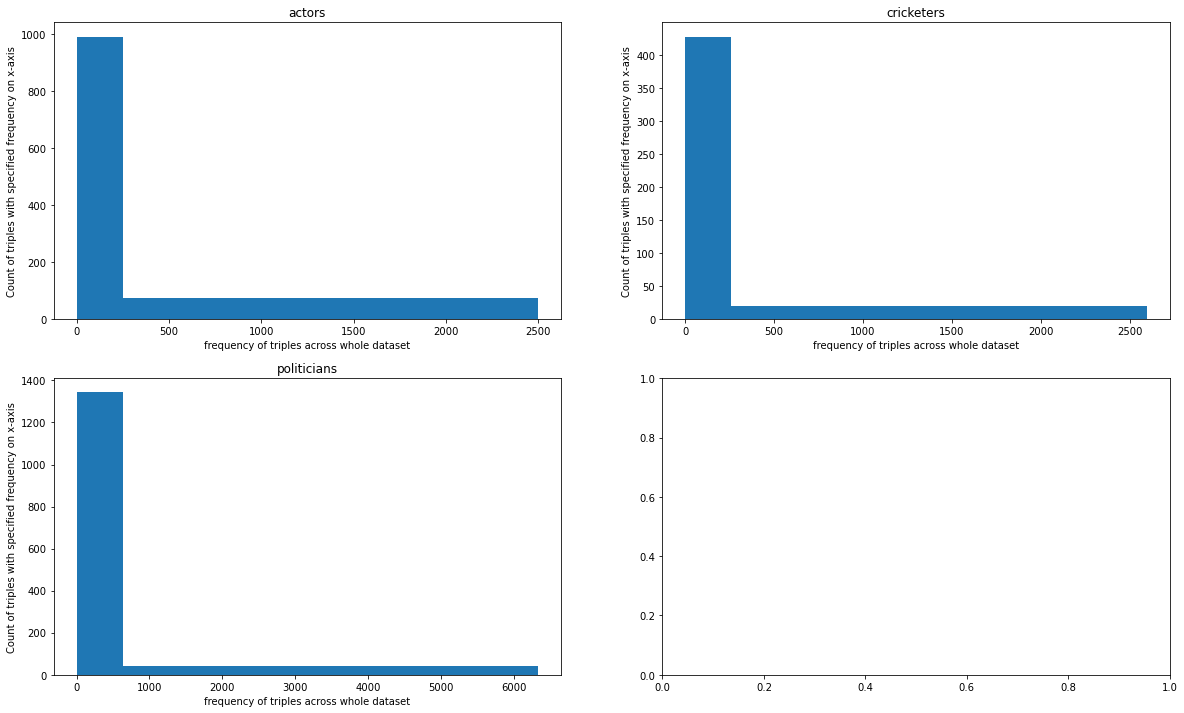

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))

ax[0, 0].hist(list(triple_freq['a'].values()), bins=[1, len(data['a']) / 10, len(data['a'])])
ax[0, 0].set_title('actors')
ax[0, 0].set_xlabel('frequency of triples across whole dataset')
ax[0, 0].set_ylabel('Count of triples with specified frequency on x-axis')

ax[0, 1].hist(list(triple_freq['c'].values()), bins=[1, len(data['c']) / 10, len(data['c'])])
ax[0, 1].set_title('cricketers')
ax[0, 1].set_xlabel('frequency of triples across whole dataset')
ax[0, 1].set_ylabel('Count of triples with specified frequency on x-axis')

ax[1, 0].hist(list(triple_freq['p'].values()), bins=[1, len(data['p']) / 10, len(data['p'])])
ax[1, 0].set_title('politicians')
ax[1, 0].set_xlabel('frequency of triples across whole dataset')
ax[1, 0].set_ylabel('Count of triples with specified frequency on x-axis')

In [14]:
fig.savefig(r'C:\Users\Shivprasad\Desktop\1.png')

In [14]:
for key in names.keys():
    for entity_id in data[key].keys():
        triples = []
        for triple in data[key][entity_id]['triples']:
            if triple_freq[key][triple['propertyLabel']] > (len(data[key]) / 10):
                triples.append(triple)
        del data[key][entity_id]['triples']
        data[key][entity_id]['triples'] = triples

In [15]:
triple_freq_reduced = defaultdict(lambda: {})

for key in names.keys():
    for entity_id in data[key].keys():
        for triple in data[key][entity_id]['triples']:
            if triple['propertyLabel'] in triple_freq_reduced[key].keys():
                triple_freq_reduced[key][triple['propertyLabel']] += 1
            else:
                triple_freq_reduced[key][triple['propertyLabel']] = 1

In [16]:
triple_count_reduced = defaultdict(lambda: 0)
for key in names.keys():
    for label in triple_freq_reduced[key].keys():
        triple_count_reduced[key] += triple_freq_reduced[key][label]

In [17]:
triple_count_reduced

defaultdict(<function __main__.<lambda>()>,
            {'a': 70973, 'c': 34443, 'p': 112284})

Text(0.5, 1.0, 'politicians')

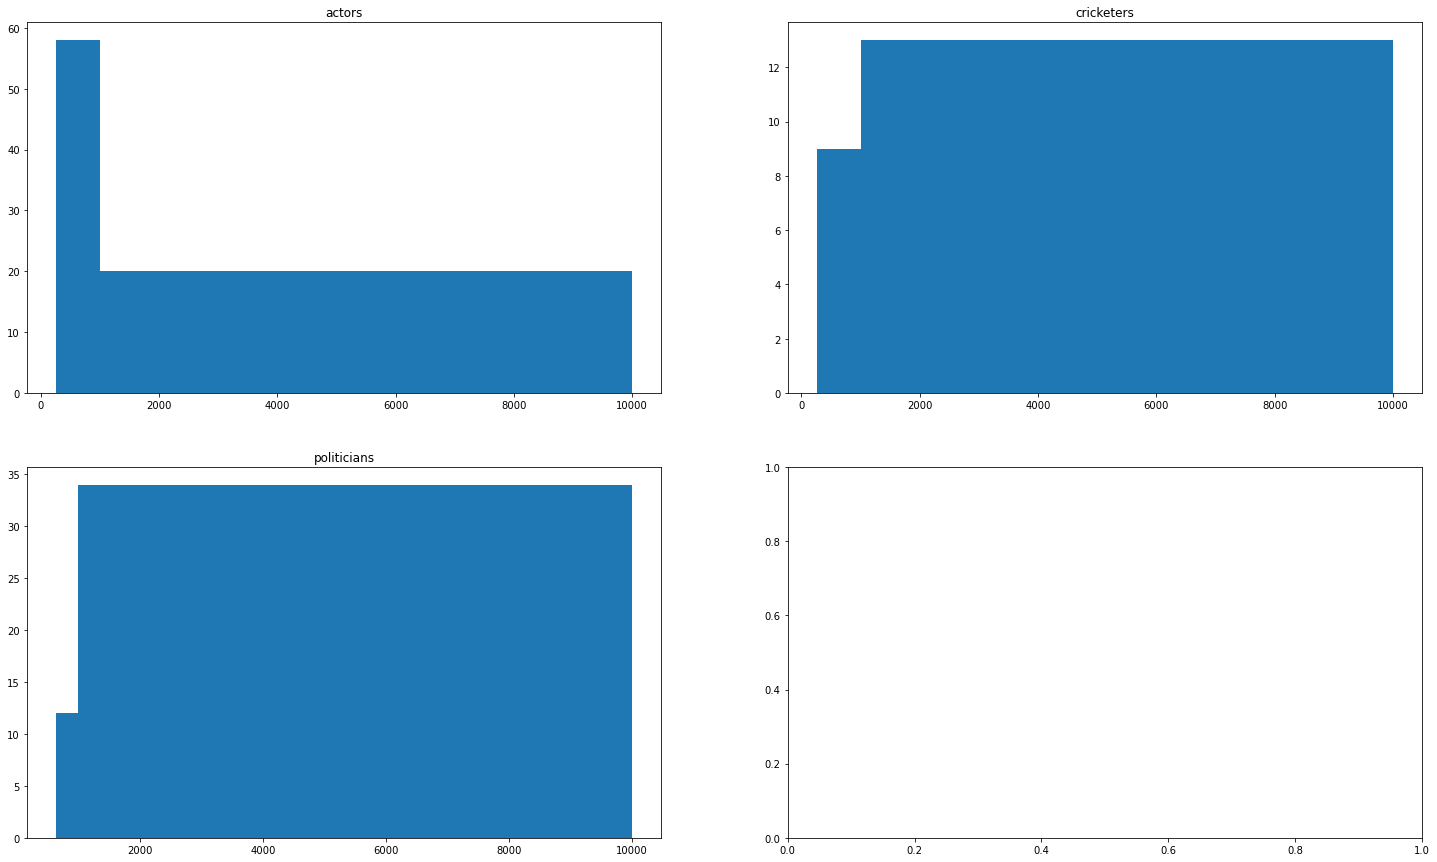

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(25, 15))

ax[0, 0].hist(list(triple_freq_reduced['a'].values()), bins=[len(data['a']) / 10, 1000, 10000])
ax[0, 0].set_title('actors')

ax[0, 1].hist(list(triple_freq_reduced['c'].values()), bins=[len(data['c']) / 10, 1000, 10000])
ax[0, 1].set_title('cricketers')

ax[1, 0].hist(list(triple_freq_reduced['p'].values()), bins=[len(data['p']) / 10, 1000, 10000])
ax[1, 0].set_title('politicians')

### Avg length of sentences

In [16]:
sentence_length = defaultdict(lambda: [])
for key in names.keys():
    for entity_id in data[key].keys():
        for sentence in data[key][entity_id]['sentences']:
            length = len(sentence)
            sentence_length[key].append(length)

In [17]:
sentence_stats = defaultdict(lambda: {})
for key in names.keys():
    sentence_stats[key]['std_dev'] = statistics.stdev(sentence_length[key])
    sentence_stats[key]['mean'] = statistics.mean(sentence_length[key])
    sentence_stats[key]['length'] = len(sentence_length[key])

In [18]:
sentence_stats

defaultdict(<function __main__.<lambda>()>,
            {'a': {'std_dev': 69.81095908371604,
              'mean': 94.69085307144232,
              'length': 51930},
             'c': {'std_dev': 60.12254374117681,
              'mean': 106.90279929759322,
              'length': 19362},
             'p': {'std_dev': 63.3682144734156,
              'mean': 95.23891556418246,
              'length': 78308}})

Text(0, 0.5, 'frequency')

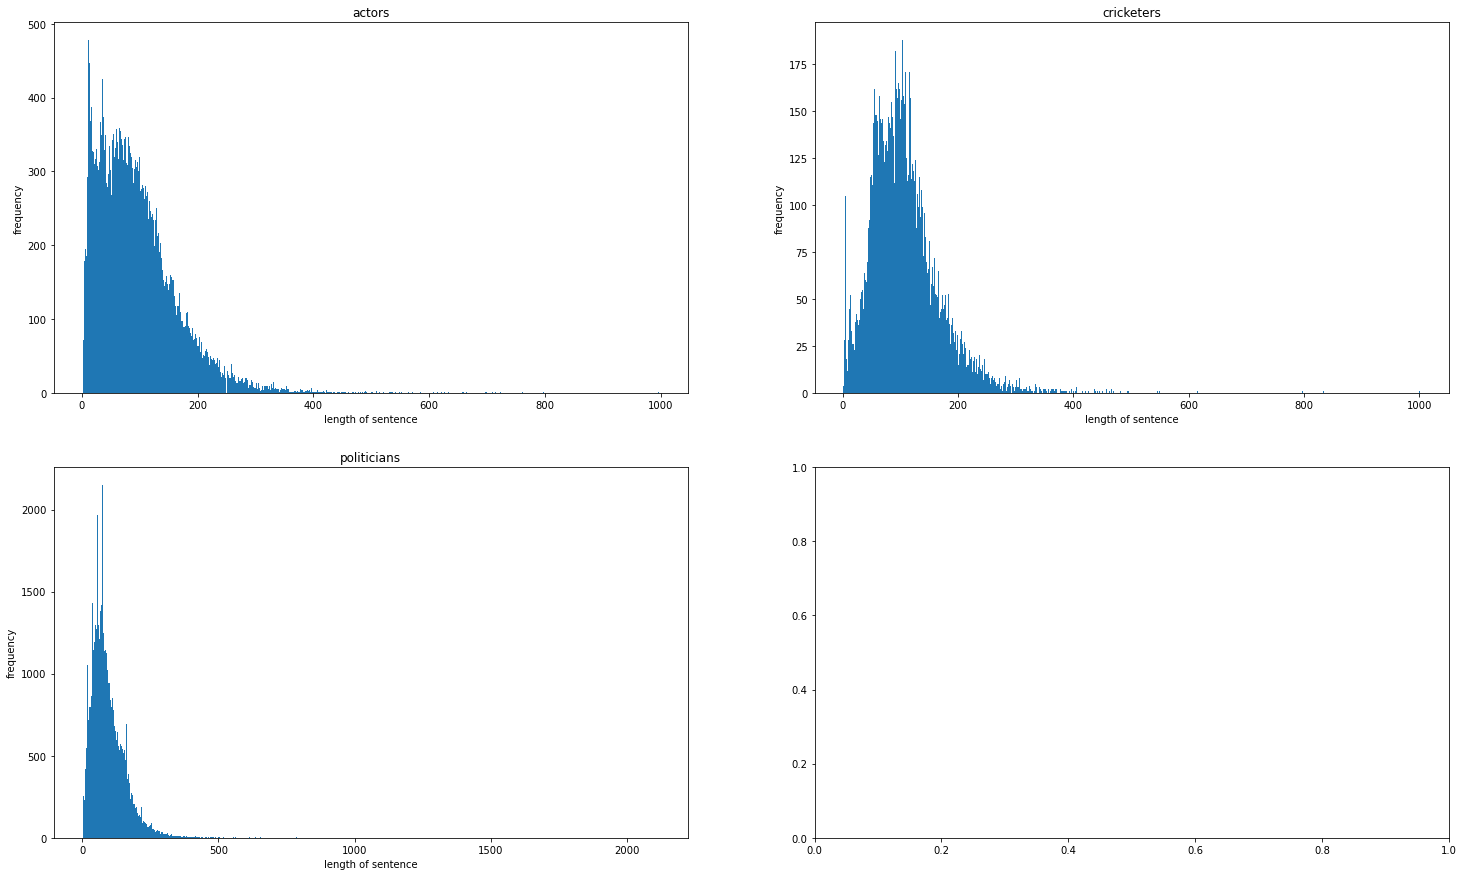

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(25, 15))

ax[0, 0].hist(sentence_length['a'], bins=1000)
ax[0, 0].set_title('actors')
ax[0, 0].set_xlabel('length of sentence')
ax[0, 0].set_ylabel('frequency')

ax[0, 1].hist(sentence_length['c'], bins=1000)
ax[0, 1].set_title('cricketers')
ax[0, 1].set_xlabel('length of sentence')
ax[0, 1].set_ylabel('frequency')

ax[1, 0].hist(sentence_length['p'], bins=1000)
ax[1, 0].set_title('politicians')
ax[1, 0].set_xlabel('length of sentence')
ax[1, 0].set_ylabel('frequency')

In [34]:
fig.savefig(r'C:\Users\Shivprasad\Desktop\2.png')

In [23]:
for key in names.keys():
    for entity_id in data[key].keys():
        sentences = [sentence for sentence in data[key][entity_id]['sentences'] if len(sentence) in range(int(sentence_stats[key]['mean'] - sentence_stats[key]['std_dev']), int(sentence_stats[key]['mean'] + sentence_stats[key]['std_dev']))]
        del data[key][entity_id]['sentences']
        data[key][entity_id]['sentences'] = sentences

In [24]:
sentence_length_reduced = defaultdict(lambda: [])
for key in names.keys():
    for entity_id in data[key].keys():
        for sentence in data[key][entity_id]['sentences']:
            length = len(sentence)
            sentence_length_reduced[key].append(length)

In [35]:
sentence_stats_reduced = defaultdict(lambda: {})
for key in names.keys():
    sentence_stats_reduced[key]['std_dev'] = statistics.stdev(sentence_length_reduced[key])
    sentence_stats_reduced[key]['mean'] = statistics.mean(sentence_length_reduced[key])
    sentence_stats_reduced[key]['length'] = len(sentence_length_reduced[key])

In [36]:
sentence_stats_reduced

defaultdict(<function __main__.<lambda>()>,
            {'a': {'std_dev': 37.533413334263926,
              'mean': 83.89919915977418,
              'length': 38085},
             'c': {'std_dev': 31.283348998798417,
              'mean': 98.52758152173914,
              'length': 14720},
             'p': {'std_dev': 33.26279160980093,
              'mean': 84.2216468237449,
              'length': 60055}})

Text(0.5, 1.0, 'politicians')

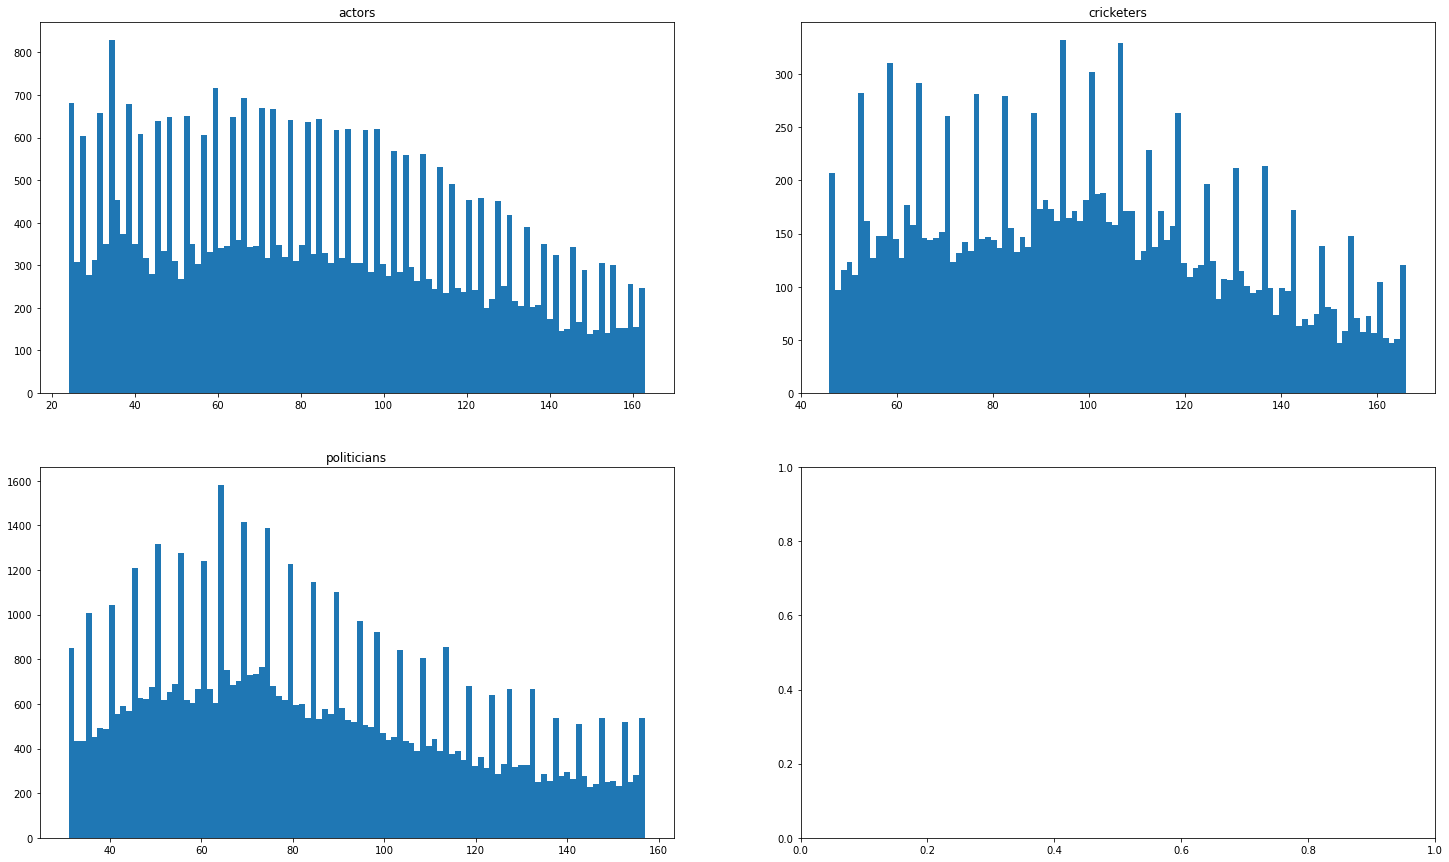

In [39]:
fig, ax = plt.subplots(2, 2, figsize=(25, 15))

ax[0, 0].hist(sentence_length_reduced['a'], bins=100)
ax[0, 0].set_title('actors')

ax[0, 1].hist(sentence_length_reduced['c'], bins=100)
ax[0, 1].set_title('cricketers')

ax[1, 0].hist(sentence_length_reduced['p'], bins=100)
ax[1, 0].set_title('politicians')

### Avg number of triples per entity

In [40]:
triple_count = defaultdict(lambda: {})

for _ in names.keys():
    total_count = 0
    min_count, max_count = float('inf'), 0
    triple_count[_]['triple_count'] = []

    for key in data[_].keys():
        count = len(data[_][key]['triples'])
        total_count += count
        max_count = max(count, max_count)
        min_count = min(count, min_count)
        data[_][key]['triple_count'] = count
        triple_count[_]['triple_count'].append(count)
    
    avg_count = total_count / len(data[_].keys())

    triple_count[_]['total'] = total_count
    triple_count[_]['avg'] = avg_count
    triple_count[_]['min'] = min_count
    triple_count[_]['max'] = max_count

### Plotting distribution of number of triples per entity

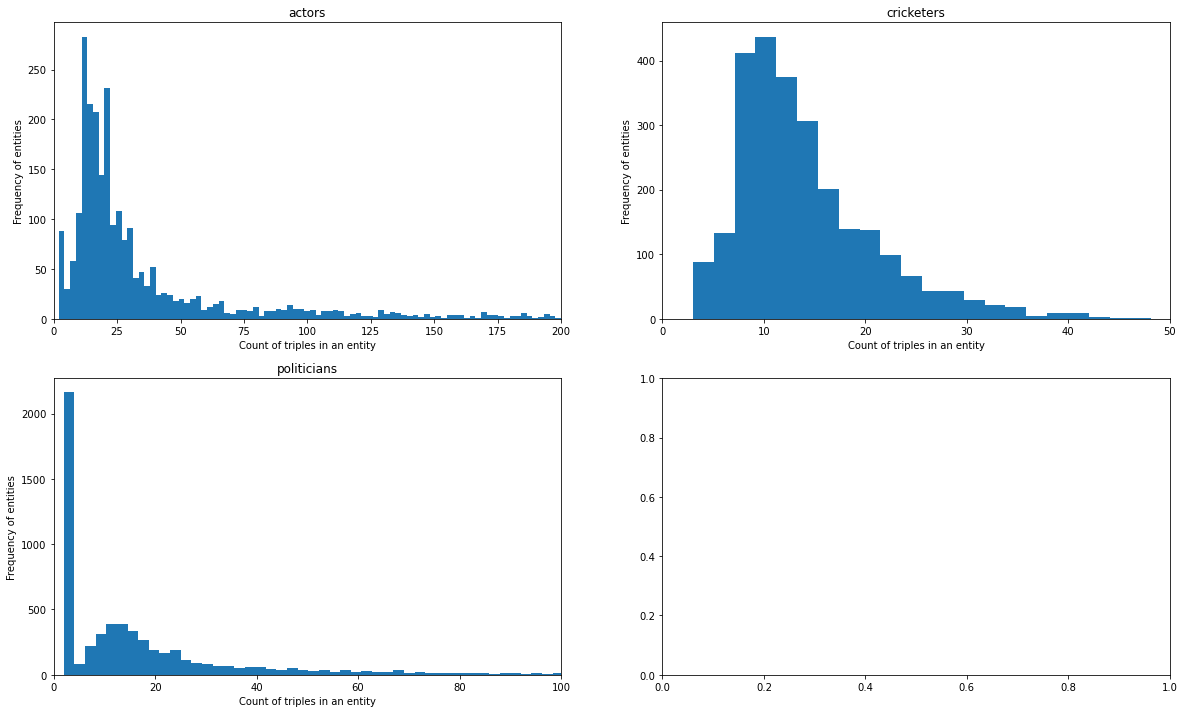

In [55]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))

ax[0, 0].hist(triple_count['a']['triple_count'], bins=200)
ax[0, 0].set_title('actors')
ax[0, 0].set_xlim([0, 200])
ax[0, 0].set_xlabel("Count of triples in an entity")
ax[0, 0].set_ylabel("Frequency of entities")

ax[0, 1].hist(triple_count['c']['triple_count'], bins=150)
ax[0, 1].set_title('cricketers')
ax[0, 1].set_xlim([0, 50])
ax[0, 1].set_xlabel("Count of triples in an entity")
ax[0, 1].set_ylabel("Frequency of entities")

ax[1, 0].hist(triple_count['p']['triple_count'], bins=200)
ax[1, 0].set_title('politicians')
ax[1, 0].set_xlim([0, 100])
ax[1, 0].set_xlabel("Count of triples in an entity")
ax[1, 0].set_ylabel("Frequency of entities")

plt.show()

In [56]:
fig.savefig(r'C:\Users\Shivprasad\Desktop\3.png')

a - 10 - 50
c - 6 - 30
p - 6 - 30

### Removing entities with triple count beyond 1 std dev.

In [48]:
for key in names.keys():
    triple_count[key]['std_dev'] = statistics.stdev(triple_count[key]['triple_count'])
    triple_count[key]['mean'] = statistics.mean(triple_count[key]['triple_count'])
    triple_count[key]['triple_count_reduced'] = [count for count in triple_count[key]['triple_count'] if count in range(int(triple_count[key]['mean'] - triple_count[key]['std_dev']), int(triple_count[key]['mean'] + triple_count[key]['std_dev']))]

In [49]:
for key in names.keys():
    print(triple_count[key]['mean'])
    print(triple_count[key]['std_dev'])
    print(len(triple_count[key]['triple_count']))
    print(len(triple_count[key]['triple_count_reduced']))

39.09811774128955
48.933198517251654
2497
2200
14.833526011560693
11.589650609396191
2595
2394
27.05808997632202
43.71171133042354
6335
5713


In [31]:
for key in list(names.keys()):
    for entity_id in list(data[key].keys()):
        if not data[key][entity_id]['triple_count'] in range(int(triple_count[key]['mean'] - triple_count[key]['std_dev']), int(triple_count[key]['mean'] + triple_count[key]['std_dev'])):
            del data[key][entity_id]

### Re Plotting the distribution with reduced entities.

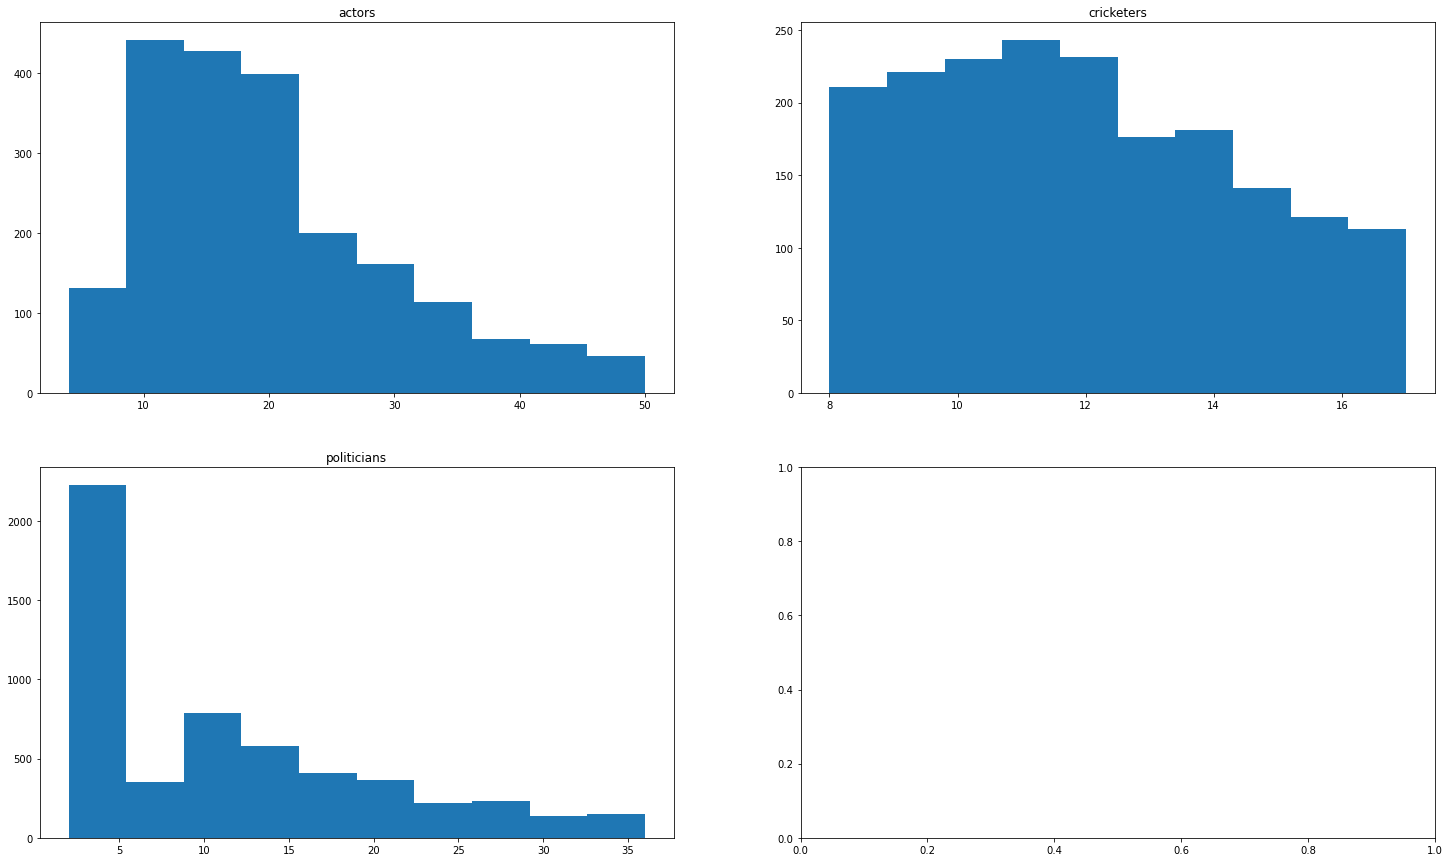

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(25, 15))

ax[0, 0].hist(triple_count['a']['triple_count_reduced'])
ax[0, 0].set_title('actors')

ax[0, 1].hist(triple_count['c']['triple_count_reduced'])
ax[0, 1].set_title('cricketers')

ax[1, 0].hist(triple_count['p']['triple_count_reduced'])
ax[1, 0].set_title('politicians')

plt.show()

### Avg number of sentences per entity

In [33]:
sentence_count = defaultdict(lambda: {})

for _ in names.keys():
    total_count = 0
    min_count, max_count = float('inf'), 0
    sentence_count[_]['sentence_count'] = []

    for key in data[_].keys():
        count = len(data[_][key]['sentences'])
        total_count += count
        max_count = max(count, max_count)
        min_count = min(count, min_count)
        data[_][key]['sentence_count'] = count
        sentence_count[_]['sentence_count'].append(count)
    
    avg_count = total_count / len(data[_].keys())

    sentence_count[_]['total'] = total_count
    sentence_count[_]['avg'] = avg_count
    sentence_count[_]['min'] = min_count
    sentence_count[_]['max'] = max_count

### Plotting the distribution of sentence count per entity

Text(0.5, 1.0, 'politicians')

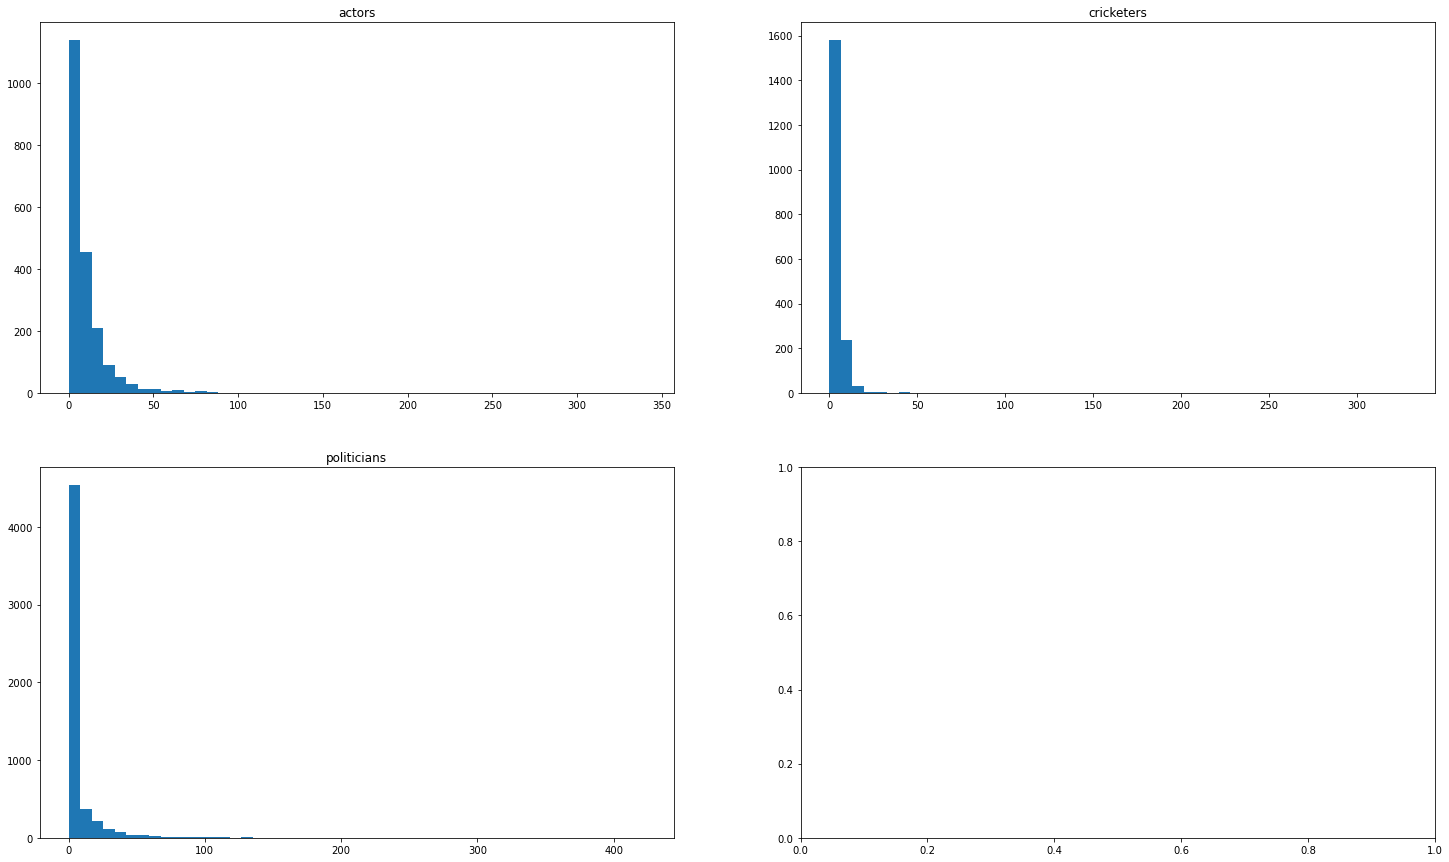

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(25, 15))

ax[0, 0].hist(sentence_count['a']['sentence_count'], 50)
ax[0, 0].set_title('actors')

ax[0, 1].hist(sentence_count['c']['sentence_count'], 50)
ax[0, 1].set_title('cricketers')

ax[1, 0].hist(sentence_count['p']['sentence_count'], 50)
ax[1, 0].set_title('politicians')

### Removing entities with sentence count beyond 1 std dev.

In [35]:
for key in names.keys():
    sentence_count[key]['std_dev'] = statistics.stdev(sentence_count[key]['sentence_count'])
    
    sentence_count[key]['mean'] = statistics.mean(sentence_count[key]['sentence_count'])
    sentence_count[key]['sentence_count_reduced'] = [count for count in sentence_count[key]['sentence_count'] if count in range(int(sentence_count[key]['mean'] - sentence_count[key]['std_dev']), int(sentence_count[key]['mean'] + sentence_count[key]['std_dev']))]

In [36]:
for key in list(names.keys()):
    for entity_id in list(data[key].keys()):
        if not data[key][entity_id]['sentence_count'] in range(int(sentence_count[key]['mean'] - sentence_count[key]['std_dev']), int(sentence_count[key]['mean'] + sentence_count[key]['std_dev'])):
            del data[key][entity_id]

### Re Plotting the distribution with reduced entities.

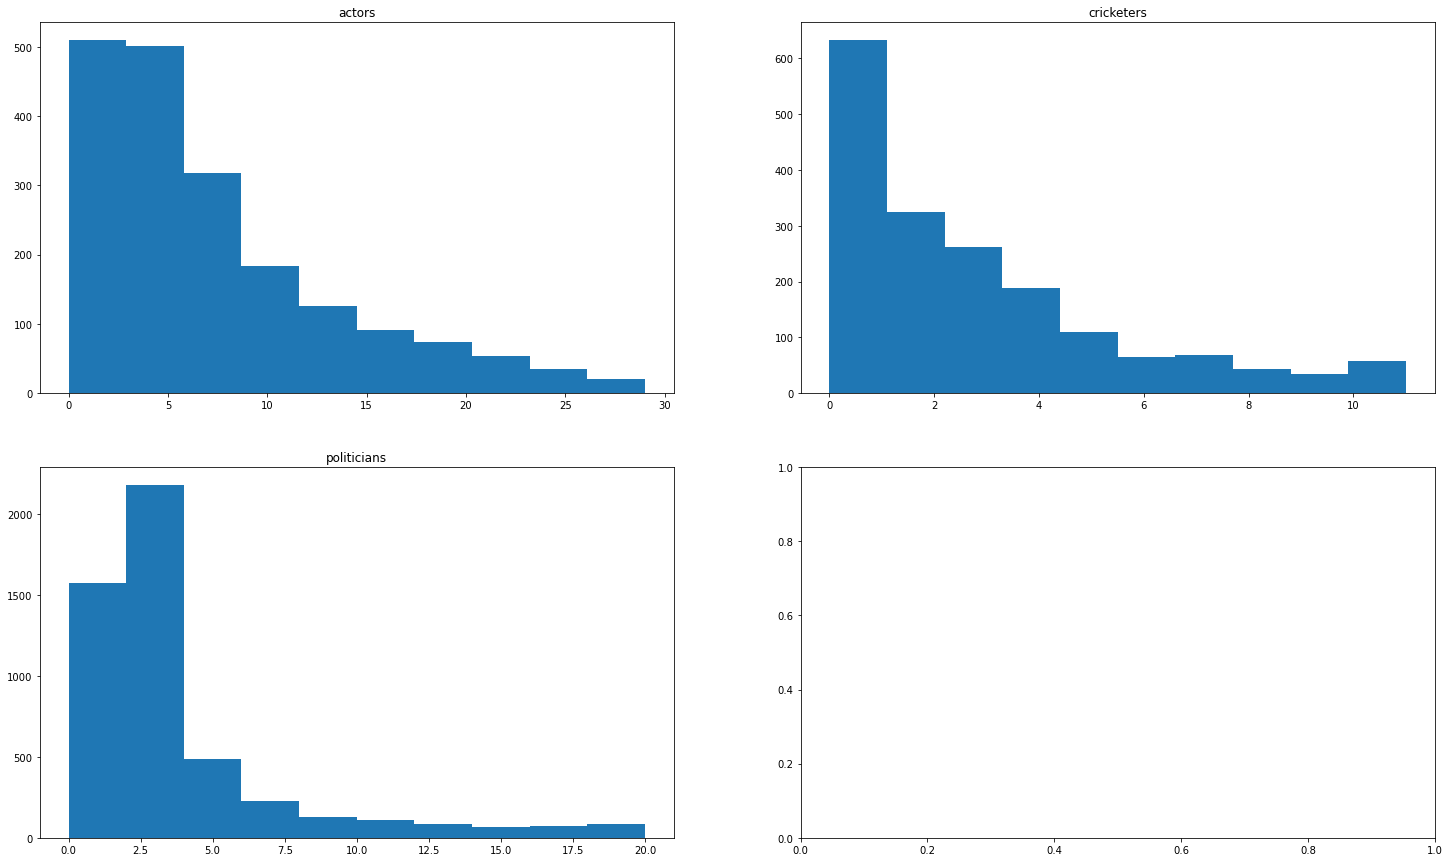

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(25, 15))

ax[0, 0].hist(sentence_count['a']['sentence_count_reduced'])
ax[0, 0].set_title('actors')

ax[0, 1].hist(sentence_count['c']['sentence_count_reduced'])
ax[0, 1].set_title('cricketers')

ax[1, 0].hist(sentence_count['p']['sentence_count_reduced'])
ax[1, 0].set_title('politicians')

plt.show()

In [38]:
for key in names.keys():
    for entity_id in data[key].keys():
        del data[key][entity_id]['triple_count']
        del data[key][entity_id]['sentence_count']

write_file_path = Path.joinpath(base_dir, 'data', 'ver 5', 'a_c_p.json')
with open(write_file_path, 'w') as write_file:
    json.dump(data, write_file)

In [42]:
len(data['c'])

1785

In [ ]:
1912, 1785, 5030